The first part is about the Potential Game. The second part focuses on Many-Agent Reinforcement Learning. 


## Part I: Potential Game





### Congestion Game

Consider a network routing game where each agent has to route a unit flow on a directed graph from one node to another. Each edge has a delay that depends on the total flow on edge. Each agent wants to minimize cost, which is the total delay
on the edges on its selected route. See Figure 1. There are four players, with start
and end nodes, as indicated. Each edge is annotated with its cost function, either
$c_e(x_e) = 0$ or $c_e(x_e) = x_e$.

![Congestion Game](https://user-images.githubusercontent.com/16293449/75630331-c2ab5900-5be1-11ea-8a7f-ee2e4d86c069.png)

*Figure 1: A network routing game, indicating the origin-destination pairs for each player
and the delay functions on each edge.*

Formulation of a congestion game




The congestion model game is defined as follows$^{[1]}$:
* N={1..n} denotes the players. In this case N={1,2,3,4}
* M={1..m} denotes the facilities (i.e. routes). In this case M={1,2,3,4,5,6}. 
* For a player $i$ $\in$ N, $A_i$ is their set of strategies. $A$ is a set of strategies for all players. 
* Where $a_i \in A_i$ is a (non-empty) subset of the facilites for player i. 
* For each facility e $\in$ M, $c_e$ $\in R^n$ is the vector of costs.
* Where $c_e(x_e)$ denotes the cost to each player using facility e, with a total of $x_e$ players using the facility. In this case $c_e(x_e)=x_e$

The overall cost function for a player $i$ is therefore defined as follows:

>$u_{i}{(\bf{a})}=\sum_{{e}\in{a_i}}c_e(n_{e}(\bf{a}))$

Where $n_{e}(\bf{a})$ is the number of players using route $e$. In other words, the cost function is the sum of the cost of each route (which is dependant on the number of players using it) taken by the player $i$ as part of its strategy $a_i$.


**References:**

[1]  Y. Mansour, “Computational learning theory - lecture 6:  Congestion andpotential games,” 2003.


Identify two pure strategy Nash equilibria of the game. Argue why there are equilibria. 



A diagram and cost table of the first identified pure strategy nash equilibrium (PSNE) is presented in figure 1 below. In each case the players take the most direct route. A second pure strategy Nash equilibirum is presented in figure 2, where each of the players take the alternative two-step route. Note that this case is a 'weak' pure strategy nash equilibrium as there are cases of alternative routes available to players, to which the players are 'indifferent' as the cost is maintained, such as that in figure 3$^{[1]}$. In this case players 3 and 4 take the direct route, whereas players 1 and 2 take the indirect 2-step route. 


**Reference below:**

[1] Peter Cramton, "Strategic Games", http://cramton.umd.edu/econ414/ch02.pdf

<img src="https://drive.google.com/uc?id=11GjO2ih9w8rOIMK2vlczo8dYXi-nKGnO" width=470/>

Figure 1. Pure Strategy Nash Equilibrium diagram and cost table where all players take the direct route.

<img src="https://drive.google.com/uc?id=1KbUO59Xt-H2kosln0ElMVuBNOBym4EwX" width=500/>

Figure 2. Pure Strategy Nash Equilibrium diagram and cost table where all players take an alternative, indirect, two-step route. 

<img src="https://drive.google.com/uc?id=1HPbZT8hxDRPXaFZcPi8RJNOr20CCEah_" width=500/>

Figure 3. Alternative of the weak PSNE from figure 2, players 4 and 3 are indifferent and select an alternative route, with no change to cost. 




### Potential Function

Formulate the potential function and determine which of the two Nash equilibrium corresponds to the maximum potential in the game. 


A potential function is a defining feature of a potential game - it represents the encapsulation for all incentives (active on all agents) to change their strategy. When an agent changes its strategy - the change in the potential function is identical to the change in that agent's cost$^{[1]}$, due to the strategy change. In the case of sa congestion game, the cost is the delay. It is a succinct method to express agent strategies and influences.

Nash equilibriums and potential functions coincide since nash equilibriums are the optimals (minima) of the potential function$^{[1]}$ - analogously, the potential function is similar to the loss function in a SGD formulation, where the datapoints should reach their equilibrium upon the (local) minima - Nash equilibrisa. It is important to find the global minima (or maximum potential in this case) in order to optimise the system.

The potential function is defined as follows:

>$\phi{(\bf{a})}=\sum_{{e=1}}^m\sum_{{x_e=1}}^{n_{e}(\bf{a})}{c_e(x_e)}$

An interpretation of this equation is that when an agent is selecting a resource, it is ignoring the effects of all later agents$^{[1]}$ - it is not looking ahead in the process to optimise its strategy.

In the first case of the direct pure stategy nash equilibrium, the following costs are associated to each edge:

>$c(x_{e(1 \rightarrow 2)})=c(x_{e(2 \rightarrow 3)})=c(x_{e(3 \rightarrow 2)})=c(x_{e(1 \rightarrow 3)})=1$

>$c(x_{e(2 \rightarrow 1)})=c(x_{e(3 \rightarrow 1)})=0$

As no more than 1 player is using any edge, the sum is simply performed over the 6 edges. Thus:

>  $\phi(\bf{a)}_{NE1}=4$.

In the case of in the indirect, 2-step, pure strategy nash equilibrium, the following costs are associated to each edge:

>$c(x_{e(1 \rightarrow 3)})=c(x_{e(1 \rightarrow 2)})=2$

>$c(x_{e(3 \rightarrow 2)})=c(x_{e(2 \rightarrow 3)})=1$

>$c(x_{e(2 \rightarrow 1)})=c(x_{e(3 \rightarrow 1)})=0$

Inserting into the potential function yields the following (considering that for edges $e(1 \rightarrow 3)$ and $e(1 \rightarrow 2)$, $n_{e}({\bf{a}})=2$):

>$\phi({\bf{a)}}_{NE2}=3+3+1+1+0+0=8$.

Therefore the second, indirect, nash equilibirum corresponds to the highest potential in this game. 

In conclusion, the second Nash equilibrium represents the global minimum of the potential function and hence the equilibrium strategy with the least overall flow cost$^{[1]}$ (the most efficient of the stable solutions).


**References:**

IEEE Referencing is used.

[1]  A. Fiat, “Lecture 4:  Computational game theory,” 2012.


 ### Equlibrium Algorithm 

Suppose the four agents are now repeatedly playing the above congestion game infinitely over time in order to minimise the accumulated costs (with discount factor $\gamma\in(0,1)$). Develop an algorithm for the agents to learn an equilibrium. 

Provide an analysis on how different parameters of the algorithms and also $\gamma$ may affect the convergency and the long-term costs obtained. 

HINT: Suggest to develop an environment interface first (e.g., like the stochatsic game in the individual assignment) where a fixed set of agents can play above (normal-form) congestion game, and keep tracking of the choices and the costs of each agent at each point in time.  The key implementation detail here will be an algorithm for learning about the costs on paths and making decisions about which path to take based on estimates of those. For the stage game, there are only two or three possible paths, so you can restrict your focus
to thinking of these as 2- or 3-action games in each time step. 
Try to implement an algorithm and report how it performs. 
Algorithms you can consider include fictitious play, multi-armed bandit algorithms like $\epsilon$-greedy, UCB1, or Thompson sampling and feel free to define the historic actions that the policies will depend on. You can use as many blocks as you want.

In [ ]:
import numpy as np


##### Congestion Game Environment #######


class CongestionGame():
  def __init__(self, episode_limit=200, **kwargs):

    # Episodes to be played
    self.episode_limit = episode_limit


    # ~~~~~ Define the agents
    self.n_agents = 4
    self.steps = 0
    self.agent_costs=np.zeros((4))

    # ~~~~~ Define Nodes
    # NOTE nodes have been shifted to 0 start indexing (they start at 1 in the description)
    # Nodes define where each of the four players are at the end of a step
    self.n_nodes= 3 
    self.nodes=[0,1,2]
    self.starting_nodes=[0,0,1,2]
    self.success_nodes=[1,2,2,1]
    self.player_state = self.starting_nodes


    # ~~~~~ Route labels
    # [1,2] [2,1] [2,3] [3,2] [1,3] [3,1]
    self.routes=[[0,1],[1,0],[1,2],[2,1],[0,2],[2,0]]
    self.route_costs=np.zeros((6))
    #self.costs=np.zeros((6))


    # ~~~~~ Define Actions - As per hint this is formulated as 2 action game
    # Player can go direct or indirect
    # 0 = direct
    # 1 = indirect
    self.n_actions = 2


  def reset(self):
    """ Returns initial observations and states"""
    self.steps = 0
    self.player_state = self.starting_nodes
    self.costs=np.zeros((6))
    self.agent_costs=np.zeros((4))
    self.route_costs=np.zeros((6))
    self.done=[0,0,0,0]
    return (self.player_state)


  def step(self, actions):
    """ Returns reward, terminated, info """
    
    # In a flow game: each player picks the final node it wishes to travel to.
    # I.e. every time step is an episode
    # The players always reach their goal - the thing that changes is the cost
    # It picks the action 'direct' or 'indirect' 
    
    # As in the Hint:
    # 'For the stage game, there are only two or three possible paths
    # so you can restrict your focus to thinking of these as 2- or 3-action games in each time step.'
    # We restrict to a 2-action game


    # For each player, find the path it took to get to the destination node and compute the costs for each route

    for p in range(self.n_agents):
      #print("~~~~~~~~~~~")
      #print("player",p+1)
      #print("chooses action", actions[p])


      if actions[p]==0:
        # Find routes that have been taken, add 1 to the cost for that route
        ind=[x for x, y in enumerate(self.routes) if (y[0] ==self.player_state[p]  and y[1] ==self.success_nodes[p])]
        self.route_costs[ind]=self.route_costs[ind]-1
        #print("goes down route",[self.player_state[p],self.success_nodes[p]])


      elif actions[p]==1:

        # If indirect find intermediate_node
        intermediate_node=np.array(self.nodes)[(np.isin(np.array(self.nodes),np.array((self.player_state[p],self.success_nodes[p])),assume_unique=False, invert=True))]
   
        #### Update route costs
        # Find routes that have been taken, add 1 to the cost for that route
        ind=[x for x, y in enumerate(self.routes) if (y[0] ==self.player_state[p]  and y[1] ==intermediate_node)]
        
        #print("goes down route",[self.player_state[p],intermediate_node[0]])
        #print("goes down route",[intermediate_node[0],self.success_nodes[p]])

        if [self.player_state[p],intermediate_node]==[2,0] or [self.player_state[p],intermediate_node[0]]==[1,0]:
          self.route_costs[ind]=self.route_costs[ind]+0
        else:
          self.route_costs[ind]=self.route_costs[ind]-1

        ind=[x for x, y in enumerate(self.routes) if (y[0] ==intermediate_node[0]  and y[1] ==self.success_nodes[p])]

        if [intermediate_node,self.success_nodes[p]]==[2,0] or [intermediate_node,self.success_nodes[p]]==[1,0]:
          self.route_costs[ind]=self.route_costs[ind]+0
        else:
          self.route_costs[ind]=self.route_costs[ind]-1


    # After the route costs have been populated, we can populate the player costs. 
    # We have total route costs, not total player costs, at the end can compute player costs by repeating the loop. 

    for p in range(self.n_agents):
      if actions[p]==0:
        ind=[x for x, y in enumerate(self.routes) if (y[0] ==self.player_state[p]  and y[1] ==self.success_nodes[p])]
        self.agent_costs[p]=self.agent_costs[p]+self.route_costs[ind]

      elif actions[p]==1:
        # If indirect find intermediate_node
        intermediate_node=np.array(self.nodes)[(np.isin(np.array(self.nodes),np.array((self.player_state[p],self.success_nodes[p])),assume_unique=False, invert=True))]
        
        ind=[x for x, y in enumerate(self.routes) if (y[0] ==self.player_state[p]  and y[1] ==intermediate_node)]
     
        self.agent_costs[p]=self.agent_costs[p]+self.route_costs[ind]

        ind=[x for x, y in enumerate(self.routes) if (y[0] ==intermediate_node  and y[1] == self.success_nodes[p])]

        self.agent_costs[p]=self.agent_costs[p]+self.route_costs[ind]

    #print("~~~~~~~~~~")
    #print("Actions Summary",actions)
    #print("Route costs ([0,1],[1,0],[1,2],[2,1],[0,2],[2,0]):",self.route_costs)
    #print("Agent costs", self.agent_costs)
    self.done=[1,1,1,1]

    self.player_state=self.success_nodes

    return self.route_costs, self.agent_costs, self.done


In [ ]:
# Random Playing - This baseline of random play is derived from supplied code in CW1

from collections import defaultdict
from functools import partial
from abc import ABCMeta, abstractmethod
import random

import matplotlib
import matplotlib.pyplot as plt

import numpy as np

def sample(pi):
  return np.random.choice(pi.size, size=1, p=pi)[0]

def normalize(pi):
    minprob = np.min(pi)
    if minprob < 0.0:
        pi -= minprob
    pi /= np.sum(pi)

class BaseAgent:
    def __init__(self, name, action_num=2, phi=0.01, gamma=0.95, episilon=0.1,eps_rate=0.995,min_eps=0.01, **kwargs):
        self.action_num = action_num
        self.episilon = episilon
        self.eps_rate = eps_rate
        self.min_eps = min_eps
        self.gamma = gamma
        self.phi = phi
        self.epoch = 0
        self.Q = None
        self.pi = defaultdict(partial(np.random.dirichlet, [1.0] * self.action_num))

    def done(self):
        pass

    def act(self, observation, exploration=False): 

        if exploration and random.random() < self.episilon: 

            return random.randint(0, self.action_num - 1) 
        else:

            return sample(self.pi[observation]) 

    @abstractmethod
    def update(self, observation, action, reward, done):
        pass

    @abstractmethod
    def update_policy(self, observation, action):
        pass



In [ ]:


# Rollout

def rollout(env, agents, exploration=True, max_iter=5000, log_episode_interval=10):
  history_reward = []
  state_n = env.reset()

  episode_count = 0
  recorded_episodes = [] #iterations at which episode is concluded 
  recorded_episode_reward = []

  for i in range(max_iter):
      #print(" ")
      #print("GAME:", i)
      actions = np.array([agent.act(state, exploration) for state, agent in zip(state_n, agents)])
   
      route_costs, agent_costs, done_n = env.step(actions)
      reward_n=agent_costs
      total_agent_cost = np.sum(agent_costs)

      for j, (state, reward, done, agent) in enumerate(zip(state_n, reward_n, done_n, agents)):
          agent.update(state, actions[j], reward, done)
          agent.episilon=max(agent.episilon*agent.eps_rate,agent.min_eps)  


      state_n = env.reset()
      history_reward.append(total_agent_cost)

      # Every episode = 1 step
      #episode_cost = 0
      episode_count += 1


      if (i + 1) %  log_episode_interval == 0:
        recorded_episodes.append(i)
        episodes_mean_reward = np.mean(history_reward)
        recorded_episode_reward.append(episodes_mean_reward)
        history_reward = []

  return recorded_episodes, recorded_episode_reward




def repeat_rollout(agent_type,agent_num,action_num,bin_width,iterations_train,iterations_test,log_episode_interval_train,log_episode_interval_test,eps,eps_rate,repeats):
  
  bins=np.linspace(bin_width, iterations_train, int(iterations_train/bin_width),endpoint=True)
  train_binned_rewards=np.zeros((bins.shape[0],repeats)) 
  train_binned_rewards_mean=np.zeros((bins.shape[0])) 
  bin_means=np.zeros((bins.shape[0]))
  test_reward=np.zeros((repeats))

  # Repeat the training or testing
  for k in range(repeats):
    
    
    agents = []
    env = CongestionGame()


    # Set up the agents
    if agent_type=='Random':
      for i in range(agent_num):
          agent = RanAgent(action_num=action_num, gamma=0.99, episilon=eps,eps_rate=eps_rate)
          agents.append(agent)
    elif agent_type=='MB':
      for i in range(agent_num):
          agent = MBAgent(action_num=action_num, gamma=0.99, episilon=eps,eps_rate=eps_rate)
          agents.append(agent)


    # Train Rollout

    
    train_recorded_episodes, train_recorded_episode_reward =  rollout(env=env, 
                                                                  agents=agents, 
                                                                  exploration=True, 
                                                                  max_iter=iterations_train,
                                                                  log_episode_interval=log_episode_interval_train)


    # When training, there are a high number of iterations
    # The episode does not always complete at the same iterations for each run
    # Therefore binning is used to compare results
    binned_data=np.digitize(train_recorded_episodes,bins)
        
    for j in range(0,len(bins)):
      inds=np.argwhere(binned_data==j)
      data=np.array(train_recorded_episode_reward)
      bin_means[j]=np.mean(data[inds])
    train_binned_rewards[:,k]=bin_means

    # Test Rollout with new policy 
    test_recorded_episodes, test_recorded_episode_reward = rollout(env=env, 
                                                          agents=agents, 
                                                          exploration=False, 
                                                          max_iter=iterations_test,
                                                          log_episode_interval=log_episode_interval_test)
    test_reward[k]=np.mean(test_recorded_episode_reward)
  train_binned_rewards_mean=np.mean(train_binned_rewards,axis=1) 
  test_mean=np.mean(test_reward) 

  return(bins, train_binned_rewards_mean, train_binned_rewards, test_mean)




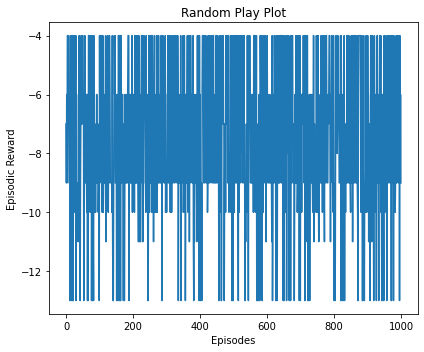

In [ ]:
# Random Play Example (for testing the environment)

class RanAgent(BaseAgent):
    def __init__(self, **kwargs):
        super().__init__('RanAgent', **kwargs)


agent_num = 4
action_num = 2
agents = []
env = CongestionGame()
for i in range(agent_num):
    agent = RanAgent(action_num=action_num, phi=0.01, gamma=0.99, episilon=0.1)
    agents.append(agent)


repeats=10


#Training - Singular 
random_recorded_episodes, random_recorded_episode_reward = rollout(env=env, 
                                                                  agents=agents, 
                                                                  exploration=True, 
                                                                  max_iter=1000,
                                                                  log_episode_interval=1)


# Plot of Example

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

ax.plot(random_recorded_episodes, random_recorded_episode_reward)

ax.set_title("Random Play Plot")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Episodes")
plt.tight_layout()
plt.show()


In [ ]:
# Implement a multi-bandit algorithm

# For each agent, each route is an 'arm' 

class MBAgent(BaseAgent):
    def __init__(self, **kwargs):
        super().__init__('MBAgent', **kwargs)
        self.Q = defaultdict(partial(np.random.rand, self.action_num))
        self.R = defaultdict(partial(np.zeros, self.action_num))
        self.count_R = defaultdict(partial(np.zeros, self.action_num))

    def done(self):
        self.R.clear()
        self.count_R.clear()



    def act(self, observation, exploration=False): #default is false
        
        # If exploration is true, explore with probability determined by eps
        if (random.random() < self.episilon) and (exploration): 
          action=random.choice(np.arange(2)) 
          return(action)

        # Otherwise exploit
        else:
          return sample(self.pi[observation]) 

    #### NOTE Observation is not required here as there is only ever one observation - however it has been retained to ensure the format of 'obseravation, action' is retained. 
    def update(self, observation, action, reward, done):
        
        # Update the probabilities 
        self.R[observation][action]=reward
        Q = self.Q[observation]

        Q[action]=(1-self.phi)*Q[action]+self.phi*(reward)
        self.Q[observation][action]=Q[action]

        # update the policy
        Q = self.Q[observation]
        self.pi[observation] = (Q == np.max(Q)).astype(np.double)
        self.pi[observation] = self.pi[observation]/(np.sum(self.pi[observation]))

        self.epoch += 1
    


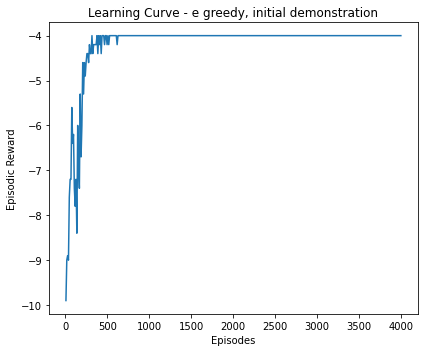

In [ ]:
# Learning Using e greedy multi bandit

agents = []
env = CongestionGame()
for i in range(agent_num):
    agent = MBAgent(action_num=2, phi=0.01, gamma=0.99, episilon=1,eps_rate=0.97,min_eps=0)
    agents.append(agent)


#Training - Singular (as provided)
train_recorded_episodes, train_recorded_episode_reward = rollout(env=env, 
                                                                  agents=agents, 
                                                                  exploration=True, 
                                                                  max_iter=4000,
                                                                  log_episode_interval=10)




# Plot of Example
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

ax.plot(train_recorded_episodes, train_recorded_episode_reward)

ax.set_title("Learning Curve - e greedy, initial demonstration")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Episodes")
plt.tight_layout()
plt.show()


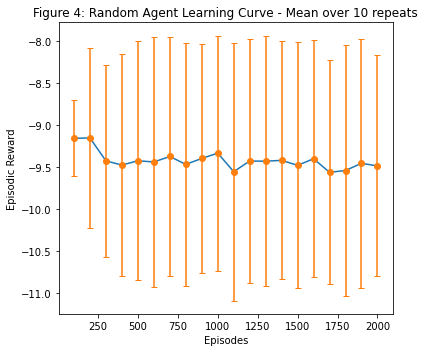

Mean test reward is: -9.39 over 10 repeats


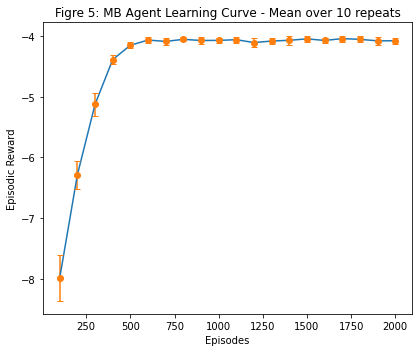

Mean test reward is: -4.0 over 10 repeats


In [ ]:
#Repeat_rollout 

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


repeats=10

agent_num = 4
action_num = 2

bins,train_binned_rewards_mean,train_binned_rewards,test_mean = repeat_rollout(agent_type='Random',agent_num=agent_num,
                                                                              action_num=action_num,
                                                                              bin_width=100,
                                                                              iterations_train=2000,
                                                                              iterations_test=10,
                                                                              log_episode_interval_train=10,
                                                                              log_episode_interval_test=1,
                                                                              eps=1,
                                                                              eps_rate=0.99,
                                                                              repeats=repeats)

# ~~~~~~~~ Plotting Train Results
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
ax.plot((bins), (train_binned_rewards_mean))
errors=np.std(train_binned_rewards,axis=1)
ax.errorbar(bins, train_binned_rewards_mean, yerr=errors, fmt='o',capsize=3)
ax.set_title("Figure 4: Random Agent Learning Curve - Mean over "+str(repeats)+' repeats')
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Episodes")
plt.tight_layout()
plt.show()


# ~~~~~~~~~ Print test results
print('Mean test reward is: '+ str(np.mean(test_mean))+' over '+str(repeats)+' repeats')

# 2) Repeat_rollout of MB agent
bins,train_binned_rewards_mean,train_binned_rewards,test_mean = repeat_rollout(agent_type='MB',agent_num=agent_num,
                                                                              action_num=action_num,
                                                                              bin_width=100,
                                                                              iterations_train=2000,
                                                                              iterations_test=10,
                                                                              log_episode_interval_train=10,
                                                                              log_episode_interval_test=1,
                                                                              eps=1,
                                                                              eps_rate=0.99,
                                                                              repeats=repeats)

# ~~~~~~~~ Plotting Train Results
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
ax.plot((bins), (train_binned_rewards_mean))
errors=np.std(train_binned_rewards,axis=1)
ax.errorbar(bins, train_binned_rewards_mean, yerr=errors, fmt='o',capsize=3)
ax.set_title("Figre 5: MB Agent Learning Curve - Mean over "+str(repeats)+' repeats')
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Episodes")
plt.tight_layout()
plt.show()

# ~~~~~~~~~ Print test results
print('Mean test reward is: '+ str(np.mean(test_mean))+' over '+str(repeats)+' repeats')








[1, 0.999, 0.998, 0.997, 0.996, 0.995]


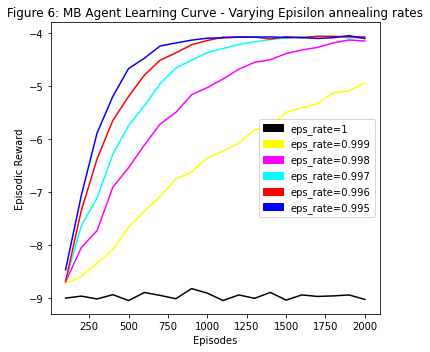

In [ ]:
# Experimenting with changing eps_rate

colors=['black','yellow','magenta','cyan','red','blue']
lines=['solid', 'solid', 'solid','solid', 'solid', 'solid']
eps_rates=[1,0.999,0.998,0.997,0.996,0.995]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
ax.set_title("Figure 6: MB Agent Learning Curve - Varying Episilon annealing rates")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Episodes") 

for e in range(len(eps_rates)):
  # 2) Repeat_rollout of MB agent
  bins,train_binned_rewards_mean,train_binned_rewards,test_mean = repeat_rollout(agent_type='MB',agent_num=agent_num,
                                                                                action_num=action_num,
                                                                                bin_width=100,
                                                                                iterations_train=2000,
                                                                                iterations_test=10,
                                                                                log_episode_interval_train=10,
                                                                                log_episode_interval_test=1,
                                                                                eps=1,
                                                                                eps_rate=eps_rates[e],
                                                                                repeats=repeats)

  
  
  ax.plot((bins), (train_binned_rewards_mean),color=colors[e],linestyle=lines[e])
  patch = mpatches.Patch(color=colors[0], label='eps_rate='+str(eps_rates[e]))
  plt.legend(handles=[patch])


p1 = mpatches.Patch(color=colors[0], label='eps_rate='+str(eps_rates[0]))
p2= mpatches.Patch(color=colors[1], label='eps_rate='+str(eps_rates[1]))
p3 = mpatches.Patch(color=colors[2], label='eps_rate='+str(eps_rates[2]))
p4 = mpatches.Patch(color=colors[3], label='eps_rate='+str(eps_rates[3]))
p5 = mpatches.Patch(color=colors[4], label='eps_rate='+str(eps_rates[4]))
p6 = mpatches.Patch(color=colors[5], label='eps_rate='+str(eps_rates[5]))

plt.legend(handles=[p1,p2,p3,p4,p5,p6])


plt.tight_layout()

plt.show()




An environment of this congestion game was developed. As this is a 'flow' game, the route costs can only be computed with knowledge of all steps taken by all agents in reaching their destinations, therefore the game is formulated to be 1 action long per episode. This action is to take the direct or indirect (2-step) route, which each agent individually selects according to policy. 

A $\epsilon$-greedy multi-bandit algorithm (MBagent) was developed to play the game. Graphs presented in figures 4 and 5 above demonstrate a random play of the game and the MBagent learning to play respectively. As demonstrated, the MB agent is succesful. This is also apparent in testing, where the maximum reward of -4 (i.e. a cost of 4) is reached after 10 repeats.  

In this case, $\gamma$ has no affect as each episode consists of one move from each agent, i.e. there is no future to consider within the episode. An experiment is performed on the affect of changing the rate of epsillon annealing, at a fixed initial episillon of 1, in figure 6. By annealing epsillon too slowly, exploitation is not promoted when there has been sufficient learning and the convergence of the learning curve occurs later. This demonstrates the importance of hyperparameter searches in ensuring fast convergence.




## Part II: Many-Agent Reinforcement Learning 

For this part, we will implement several multi-agent deep reinforcement learning algorithms to play in the `Combat` environment from ma-gym. Please read [the wiki of ma-gym](https://github.com/koulanurag/ma-gym/wiki/) first.

### Environment Description
![Combat](https://github.com/koulanurag/ma-gym/raw/master/static/gif/Combat-v0.gif)


Combat environment simulates a battle involving two opposing teams in a `20×20` grid. Each team consists of `m = 10` agents and their initial positions are sampled uniformly in a `5×5` square around the team center, which is picked uniformly in the grid.

#### Action Space
At each time step, an agent can perform one of the following actions:
*   move one cell in one of four directions;
*   attack another agent by specifying its ID `j` (there are `m` attack actions, each corresponding to one enemy agent);
*   do nothing.

#### Transition Dynamics
If agent A attacks agent B, then B’s health point will be reduced by 1, but only if B is inside the firing range of A (its surrounding `3×3` area). Agents need one-time step of cooling down after an attack, during which they cannot attack. All agents start with three health points and die when their health reaches 0. A team will win if all agents in the other team die. The simulation ends when one team wins, or neither of the teams win within 40 time steps (a draw).

#### Observation Space
When the input to a model, each agent is represented by a set of one-hot binary vectors `{i, t, l, h, c}` encoding its unique ID, team ID, location, health points, and cooldown. A model controlling an agent also sees other agents in its visual range (`3×3` surrounding area).

#### Reward Settings
The model gets a reward of -1 if the team loses or draws at the end of the game. In addition, it also get a reward of −0.1 times the total health points of the enemy team, which encourages it to attack enemy bots.

#### Enemy Settings
Our model controls one team during training, and the other team consists of bots that follow a hardcoded policy. The bot policy is to attack the nearest enemy agent if it is within its firing range. If not, it approaches the nearest visible enemy agent within the visual range. An agent is visible to all bots if it is inside the visual range of any individual bot. This shared vision gives an advantage to the bot team.

In [ ]:
%matplotlib inline
import gym
import ma_gym
from ma_gym.wrappers import Monitor
from ma_gym.envs.combat.combat import Combat
import matplotlib.pyplot as plt
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env


from functools import reduce
from operator import add

#### Example of playing Combat Using Random Policy






In [ ]:
env = wrap_env(Combat(grid_shape=(20, 20), n_agents=10, n_opponents=10))
done_n = [False for _ in range(env.n_agents)]
ep_reward = 0

obs_n = env.reset()


while not all(done_n):
    obs_n, reward_n, done_n, info = env.step(env.action_space.sample())
    ep_reward += sum(reward_n)
    env.render()
env.close()

show_video()

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Trying to monitor an environment which has no 'spec' set. This usually means you did not create it via 'gym.make', and is recommended only for advanced users.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Implementation of Mean Field Multi-Agent Reinforcement Learning 
Implement [Mean Field Multi-Agent Reinforcement Learning (MFRL)](https://arxiv.org/abs/1802.05438) to play the Combat game.





In [ ]:
import numpy as np
import random
from collections import namedtuple, deque

import torch
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn

In [ ]:
import numpy as np
import random
from collections import namedtuple, deque

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 500 #64    # minibatch size
GAMMA = 0.99            # discount factor
TAU =  1e-3 #0.05       # for soft update of target parameters
LR =  5e-4  #0.001 #5e-4# learning rate 
UPDATE_EVERY = 4        # how often to update the network

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, state_size, action_size, seed):
        """Initialize an Agent object. """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)


        # Q-Network
        self.qnetwork_local = QNetwork(state_size, action_size, seed).to(device)
        self.qnetwork_target = QNetwork(state_size, action_size, seed).to(device)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=LR)

        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = 0
    
    def step(self, state, action, reward, next_state, done):
        self.memory.add(state, action, reward, next_state, done)
        
        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > BATCH_SIZE:
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)

    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy."""

        state = np.asarray(state)
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
        self.qnetwork_local.train()

        # Epsilon-greedy action selection
        number = random.random()

        if number > eps:
            defact = np.argmax(action_values.cpu().data.numpy())
            
            return defact
        else:
            return random.choice(np.arange(self.action_size))


    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples. """
        states, actions, rewards, next_states, dones = experiences
        # Get max predicted Q values (for next states) from target model
        Q_targets_next = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)

        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

        # Get expected Q values from local model
        Q_expected = self.qnetwork_local(states).gather(1, actions)

        # Compute loss
        loss = F.mse_loss(Q_expected, Q_targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- #
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)                     

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters."""
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)


class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object."""
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)
        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

class QNetwork(nn.Module):
    """Actor (Policy) Model."""
    def __init__(self, state_size, action_size, seed, fc1_units=150, fc2_units=1): #150, 1
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)

    def forward(self, state):
        """Build a network that maps state -> action values."""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

def mfq(n_episodes=100, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """MF-Q.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    
    env = gym.make('Combat-v0') 
    env.seed(0)
    team_rewards = []
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon


    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        step_ct = 0
        done = False

        n_group = 5

        action = np.array([None for _ in range(n_group)])
        ids = np.array([0 for _ in range(n_group)])

        mean_rewards = []
        total_rewards = []
        former_act_prob = [np.zeros((1, 5)), np.zeros((1, 15))]  

        score = 0 # cumulative reward for each episode
        for t in range(max_t):
            for i in range(n_group):
              action[i] = agent.act(state[i], eps) # map the state to an action for each agent

            next_state, reward, done, _ = env.step(action) # take a step and return observation data

            sum_reward = sum(reward) 
            reward = sum_reward / 5 # the new reward is the mean of all the rewards
            mean_rewards.append(reward) # track the mean reward
            total_rewards.append(sum_reward) # track the total reward

            for i in range(n_group):

              agent.step(state[i], [action[i]], [reward], next_state[i], done[i]) # use the mean reward to learn and find a new state

            state = next_state # put the state equal to the new found state

            score += sum_reward # track the score

        step_ct += 1
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon

        for i in range(n_group):
          mean_rewards[i] = sum(mean_rewards) / len(mean_rewards)
          total_rewards[i] = sum(total_rewards)

        if i_episode % 10 == 0:
            print('\rEpisode {}\tMean Reward: {:.2f}\tScore: {}'.format(i_episode, mean_rewards[i], total_rewards[i]))
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))

    return mean_rewards, total_rewards, scores

agent = Agent(state_size=150, action_size=5, seed=0)

mean_rewards, total_rewards, scores = mfq()


#### Plot the Learning Curve

In [ ]:
# Final epsiode learning 
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
plt.plot(total_rewards[0:16])
plt.ylabel('Reward')
plt.xlabel('Itteration')
plt.tight_layout()
plt.show()

In [ ]:
 fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
#plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(total_rewards)), total_rewards)
plt.ylabel('Reward')
plt.xlabel('Episode #')
plt.tight_layout()
plt.show()

#### Analysis on Performance


Multiagent reinforcement learning becomes exponentially more difficult as the number of agents increases due to the increase in possible interactions between agents. As a result, a Q-learning algorithm applied to such a problem may not be able to capture the full state of the environment, focusing instead on the immediate surroundings of a single agent rather than the overall optimal policy [3]. 

To obtain a more accurate portrayal of the overall system mean field theory can be used [1]. Mean field theory studies the behaviour of high-dimensional stochastic models such as in the combat battle game. It can be used to approximate the interactions between all agents using a simpler model which reduces the interactions to those between a central agent and a “mean” agent which captures the average state of the environment. This is done iteratively for all agents in the environment; in this case the five agents which make up the red team in the combat environment [2]. Effectively, the problem has now become a single-agent system and a Q-function can be applied successfully to learn the optimal policy for the central agent. 

The combat game is an incomplete game with perfect information and a discrete action space. This means that each agent can only know its own state but can react to past actions of other agents and their outcomes in terms of reward [4]. The agent also has a given number of discrete actions which it can take. The pairwise interactions between each agent j and its N surrounding neighbours which make up the “mean” agent are summarised through the following Q-function:


$$ Q^j(s,\mathbf{a}) = \frac{1}{N^j} \sum_{k} \in N(j) Q^j(s,a^j,a^k) $$ [3]


In the equation above, the action taken by the central agent is a^j. The mean action, $a^{-j}$ is calculated based on agent j’s neighbourhood, N(j). This is expressed by the following,

$$a^k = a^{-j} + \delta a^{j,k}, $$ where, $$ a^{-j} = \frac{1}{N^j} \sum_k a^k$$ (Yang et al., 2018)
\end{centre}

Where a^k is the one-hot action of each agent k in N(j). The term $\delta a^{j,k}$ is simply a small fluctuation representing uncertainty [3].

To show that mean field theory can be applied to a Q-function and used to approximate the combat game the pairwise Q-function is equated to the original Q-function for an N-agent game, 

$$ Q^j(s,\mathbf{a}) = r^j(s, \mathbf{a}) + \gamma {E}_s’ \sim p [v^j_\mathbf{\pi} (s’)] $$\\
$$ Q^j(s,\mathbf{a}) = \frac{1}{N^j} \sum_{k} Q^j(s,a^j,a^k) $$ [3]

The right hand side of the equation can be expanded and reformulated to show that,

$$Q^j(s,\mathbf{a}) \approx Q^j(s,a^j,a^{-j}) + \frac{1}{2N^j} \sum_k R^j_{(s,a^j)} (a^k) \approx Q^j(s,a^j,a^{-j})$$

The final term, $R^j_{(s,a^j)} (a^k)$, denotes the Taylor polynomial’s remainder and is a random variable bounded by a symmetric interval. Furthermore, the remainders cancel each other out due to the homogeneity between agents, finally resulting in,

$$Q^j(s,\mathbf{a}) = Q^j(s,a^j,a^{-j}).$$

In order to find the optimal policy for each agent, the “central” agent must be updated iteratively. The mean action is updated by looking at the average action in the neighbourhood N(j). Upon the calculation of the new action, the policy at time step t, $\pi^j_t$ adapts to the change and updates. In turn the next action will also update and so on until the policy converges. 


**References:**

[1]"Mean Field Theory", Xbeams.chem.yale.edu, 2020. [Online]. Available: http://xbeams.chem.yale.edu/~batista/vaa/node39.html. [Accessed: 27- Apr- 2020].

[2]"koulanurag/ma-gym", GitHub, 2020. [Online]. Available: https://github.com/koulanurag/ma-gym/wiki/Environments#Combat. [Accessed: 27- Apr- 2020].

[3]Y. Yang, R. Luo, M. Li, W. Zhang and J. Wang, Arxiv.org, 2018. [Online]. Available: https://arxiv.org/pdf/1802.05438.pdf. [Accessed: 27- Apr- 2020].

[4]S. Demichelis, K. Ritzberger and J. Swinkels, The Simple Geometry of Perfect Information Games. 2002.




The problem of multi-agent reinforcement learning becomes increasingly difficult to solve as the number of agents increases. Simple Q-learning approaches do not encapsulate enough information about the overall system and so fail to converge. For this task, three different algorithms are examined which attack the problem in diverse ways. COMA explores the role of a global critic which assesses all information about the environment, CommNet focuses on the learning of communication between agents and finally MFRL iterates through a central agent which updates its policy based on its neighbouring agents.
 
# **Comaprison of MFRL and other MARL algorithms:**
 
There is a core similarity between mean field and COMA; they both use generalisations of the learning process of all agents to optimise a solitary value-based network/system$^{[4]}$. In MFRL this is done by looking at the average effect a step has on the surrounding neighbourhood of a central agent whereas in COMA this is done through a global critic which approximates the Q value function$^{[4]}$. Taking the mean of the surrounding state (as is done in MFRL) can leave out valuable information, notably the effect of more extreme values can be amplified and so agents who do very well or very badly may have a strong influence on the central agent. COMA has an advantage to this as it processes more information on the state of the overall system. 
 
CommNet and COMA both share the same core architecture. Each actor has its own occupying network (in Commnet this is for relating to other agents, in COMA this is for policy control), whilst there is a solitary global network which brings all of these states and networks together to assess global communicativity.
 
CommNet requires a separate network, or controller, to learn the communication between agents. This is dissimilar to MFRL which has no explicit communication between agents but rather iteratively processes a central agent.
 
MFRL and COMA can both be implemented using AC based algorithms$^{[2]}$ (unlike CommNet). This can ensure a comprehensive understanding of the environment’s overall state without explicit agent communication. However, it has been shown that MF-Q tends to perform better in battle type games and so this version was implemented here. 
 

# **Comparison with Other Multi-Agent Algorithms:**

Previously, two individual DQNs were used in order to perform multi-agent tasks. This is far less advantageous than using any of the above three algorithms since it does not take advantage of collaboration and since the multi-DQN system simply sees other agents as part of the environment, it is intrinsically less stable as its environment is transient$^{[4]}$. It is also computationally inefficient as all processes must be completed in series rather than in a single algorithm.

Mean Actor-Critic$^{[5]}$ is a method which utilises all action values, instead of just the action executed, as is seen in the COMA implementation (Q_s_u in define_advantage). This addition could improve upon COMA, as it would reduce the variance in the policy gradient optimisation$^{[1]}$.
 
# **Differences:**
 
The only one of these implementations which takes advantage of policy gradients and A2C is COMA. This is because the actor-critic architecture takes advantage of both value-based (critic) and gradient-based (actor) methods, garnering the benefits of both (eg. the non-deterministic nature of policy gradients and the mapping skills of value-based methods), which could suggest that it is more robust than the others.
 
The only network which takes an individualistic approach to connectivity is CommNet - through its modules, it can model non-linear communication between each agent. This algorithm accounts for communication between agents in both its global network and its individual module networks. Conversely, COMA only accounts for connectivity in the global critic, which learns the values of each state - each actor network is just taught its role by the central critic. This two-fold approach to connectivity may imply that CommNet would be more successful in extremely large multi-agent settings (disregarding computational resources), where COMA's bootstrapping could hinder its global critics estimations. The MFRL has no direct communication between agents however, each central agent is aware of its neighbouring environment which is modeled as a “mean” agent.
 
Mean field and COMA share similar concepts of centralising value-based learning within one network, however, the mean field algorithm implemented here uses deep Q-learning while COMA is based on an actor-critic network. Mean field theory can also be used in a MF-AC algorithm, though this was found to be less successful in battle type games ^{[7]}. While COMA uses a central critic to retain perfect knowledge of all agent observations, MFRL iteratively focuses on a central agent and observes the average effect of all other agents at that time step. 
 
# **Reward Consensus:**

The Commnet and COMA systems are able to achieve a total reward of zero whereas the MFRL tracks mean reward. The mean reward in MFRL also converges to zero, showing that the total reward must also be zero.
The reward system described on the ma gym wiki and in this notebook do not seem to coincide with the ma gym source code and performance${[6]}$. Specifically, one point is subtracted from the reward if a friendly agent is hit, and vice versa for one point added. This means that the zero case is either when no agent hits another (most likely), or when the amount of hits is exactly even (unlikely). During exploration, whenever the friendly team randomly meets the enemy team, the hardcoded enemy team likely beats them and the net reward is negative for the friendly team. Therefore, with this reward setup, the likely result of learning is for the friendly team to actively avoid the enemy team, rather than fighting them. This can be seen in the CommNet section.
 The reward system described in this notebook and the ma gym wiki${[6]}$ was implemented on each of these three systems, as a supplementary negative reward, at the end of each episode. However, this hindered the system as the hardcoded reward system could not be nullified, therefore the reward was too low, hindering learning - hence it is not included.


**References: **

IEEE Referencing used. All references were most recently accessed on 27th April 2020.

[1]  A.L.Ecoffet, “An intuitive explanation of policy gradient.” https://towardsdatascience.com/an-intuitive-explanation-of-policy-gradient-part-1-reinforce-aa4392cbfd3c.

[2]  MathWorks, “Actor-critic agents.” https://uk.mathworks.com/help/reinforcement-learning/ug/ac-agents.html#mw_2067355b-96d6-452d-bcd6-18d6e4b8614f.

[3]  J.  N.  Foerster,  G.  Farquhar,  T.  Afouras,  N.  Nardelli,  and  S.  Whiteson,“Counterfactual multi-agent policy gradients,”CoRR, vol. abs/1705.08926,2017.

[4]  Microsoft,  “Counterfactual  multi-agent  policy  gradients.” https://www.youtube.com/watch?v=3OVvjE5B9LU&t=1406s.

[5]  C. Allen, K. Asadi, M. Roderick, A. rahman Mohamed, G. Konidaris, and M. Littman, “Mean actor critic,” 2017.

[6]  A.   Koul, “ma-gym   combat.py.” https://github.com/koulanurag/ma-gym/blob/master/ma_gym/envs/combat/combat.py.


[7]Y. Yang, R. Luo, M. Li, W. Zhang and J. Wang, Arxiv.org, 2018. [Online]. Available: https://arxiv.org/pdf/1802.05438.pdf. [Accessed: 27- Apr- 2020].
